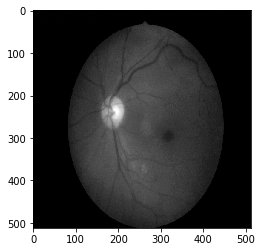

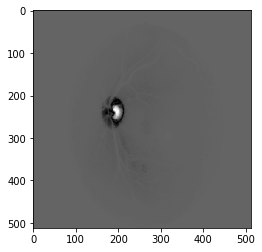

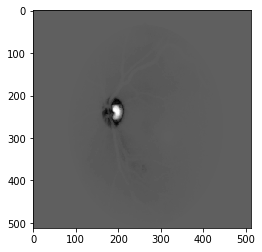

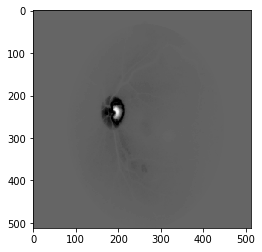

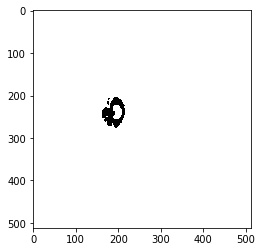

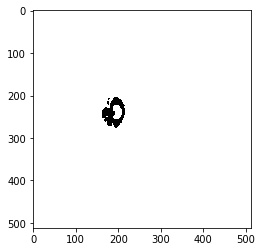

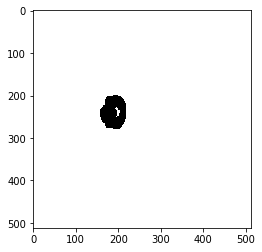

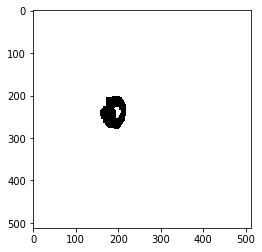

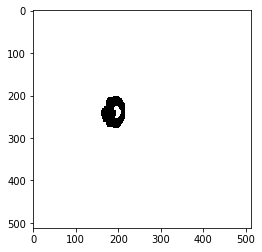

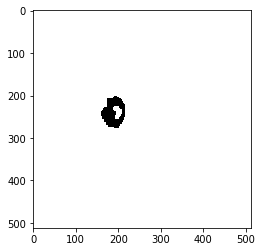

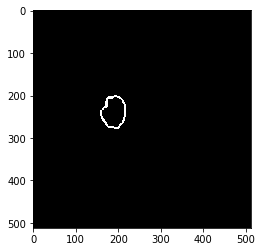

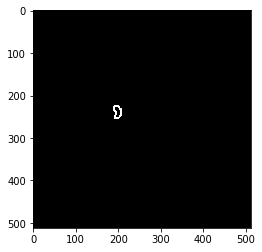

ok
1


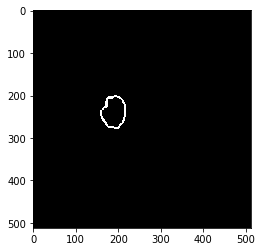

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Mon Nov 18 15:41:56 2019

@author: user
"""

import numpy as np
import os
import cv2
import pickle
import matplotlib.pyplot as plt
import math
#
DATADIR ="source/0249478-18534.jpg"
IMG_SIZE = 512



kernel = np.ones((3,3), np.float)
kernel2 = np.ones((9,9), np.float)
img1 = cv2.imread(DATADIR ,1)
img = img1[:,:,1]
img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
brg=np.mean(img)
if(brg>80):
    con=27
if(brg>70):
    con=37
if(brg>56):
    con=40
if(brg>50):
    con=55
else:
    con = 65
    
plt.imshow(img, cmap='gray')  # show it in grayscale
plt.show()  # display!

img_2 =np.zeros((512,512),dtype='float')
rows,cols=np.shape(img)
for i in range(rows):
    for j in range(cols):
        k=-((float(img[i][j])-255)**2)/((2*con)**2)
        img_2[i][j]=math.exp(k)
        if img_2[i][j]<0.5:
            img_2[i][j]=1-2*(img_2[i][j]**2)
        else :
            img_2[i][j]=2*(img_2[i][j]**2)
img_erosion = cv2.dilate(img_2, kernel, iterations=1) 
img_g=img_2*255
plt.imshow(img_g, cmap='gray')  # show it in grayscale
plt.show()  # display!
img_e=img_erosion*255
plt.imshow(img_e, cmap='gray')  # show it in grayscale
plt.show()  # display!
img_erosion = cv2.erode(img_2, kernel, iterations=1) 
img_e=img_erosion*255
plt.imshow(img_e, cmap='gray')  # show it in grayscale
plt.show()  # display!
ret,thresh = cv2.threshold(img_e,200,255,cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')  # show it in grayscale
plt.show()  # display!
img_3 =np.zeros((512,512),dtype='uint8')
for i in range(rows):
    for j in range(cols):
        img_3[i][j]=int(thresh[i][j])

plt.imshow(img_3, cmap='gray')  # show it in grayscale
plt.show()  # display!

img_3 = cv2.erode(img_3, kernel2, iterations=1) 
plt.imshow(img_3, cmap='gray')  # show it in grayscale
plt.show()  # display!
img_3 = cv2.dilate(img_3, kernel, iterations=1) 
plt.imshow(img_3, cmap='gray')  # show it in grayscale
plt.show()  # display!
img_3 = cv2.dilate(img_3, kernel, iterations=1) 
plt.imshow(img_3, cmap='gray')  # show it in grayscale
plt.show()  # display!
img_3 = cv2.dilate(img_3, kernel, iterations=1) 
plt.imshow(img_3, cmap='gray')  # show it in grayscale
plt.show()  # display!

contours, hierarchy = cv2.findContours(img_3,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

maxz=0
c=0
for i in range(1,np.size(contours)):
    img_4 =np.zeros((512,512),dtype='uint8')
    img_4 = cv2.drawContours(img_4, contours, i, 255, 3)
    area = cv2.contourArea(contours[i])
    plt.imshow(img_4, cmap='gray')  # show it in grayscale
    plt.show()  # display!
#    print(i)
    if area > maxz:
        maxz=area
        c=i
#    print(maxz)
print("ok")
print(np.size(contours)-2)
img_4 =np.zeros((512,512),dtype='uint8')
img_4 = cv2.drawContours(img_4, contours, c, 255, 3)
plt.imshow(img_4, cmap='gray')  # show it in grayscale
plt.show()  # display!
